In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
file_path = "datasets/bank_transfers.csv"

In [28]:
df = pd.read_csv(file_path)

print(df.head(50).to_markdown(index=False, numalign="left", stralign="left"))

| Concept   | Supplier                                                                                               | Voucher       | Amount   | Paid date   | Operation number   |
|:----------|:-------------------------------------------------------------------------------------------------------|:--------------|:---------|:------------|:-------------------|
| FAC       | Baslog S.R.L. (0474 - BARRACAS AL SUR)                                                                 | 0005-00105025 | 25972    | 22/07/2020  | 170215210          |
| FAC       | Marpel S.A. (0468 - MARPEL)                                                                            | 0002-00013130 | 12864    | 22/07/2020  | 170306036          |
| FAC       | Tronador Sociedad Anonima Comercial (1861 - RAPANUI)                                                   | 0087-00008566 | 25000    | 22/07/2020  | 170306117          |
| FAC       | Urien-Loza S.A. (0816 - URIEN-LOZA)                                              

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Concept           200 non-null    object 
 1   Supplier          200 non-null    object 
 2   Voucher           107 non-null    object 
 3   Amount            200 non-null    float64
 4   Paid date         200 non-null    object 
 5   Operation number  200 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [34]:
total_amount = df.groupby("Supplier")["Amount"].sum()
total_amount

Supplier
Armadora San Jorge S.A. (0351 - SUPERBE)                                                                                      234315.88
Baslog S.R.L. (0474 - BARRACAS AL SUR)                                                                                        284355.00
Bitarwan Foods S.A. (0970 - BITARWAN)                                                                                           9050.80
Diego Alberto Badoglio (1452 - BANICO´S)                                                                                        3107.32
Distrosol S.A. (0277 - DISTROSOL)                                                                                             295171.07
Edgardo Perez S.A. (1072 - EDGARDO PEREZ S.A.)                                                                                 15000.00
Fabuel Jimena Cecilia (1523 - CDRA. FABUEL JIMENA CECILIA)                                                                     19000.00
Fernandez Diego Ezequiel (1636 - GLASS 

In [33]:
frequency = df.groupby("Supplier")["Amount"].count()

frequency

Supplier
Armadora San Jorge S.A. (0351 - SUPERBE)                                                                                      7
Baslog S.R.L. (0474 - BARRACAS AL SUR)                                                                                       16
Bitarwan Foods S.A. (0970 - BITARWAN)                                                                                         1
Diego Alberto Badoglio (1452 - BANICO´S)                                                                                      1
Distrosol S.A. (0277 - DISTROSOL)                                                                                            25
Edgardo Perez S.A. (1072 - EDGARDO PEREZ S.A.)                                                                                1
Fabuel Jimena Cecilia (1523 - CDRA. FABUEL JIMENA CECILIA)                                                                    1
Fernandez Diego Ezequiel (1636 - GLASS GO)                                                     

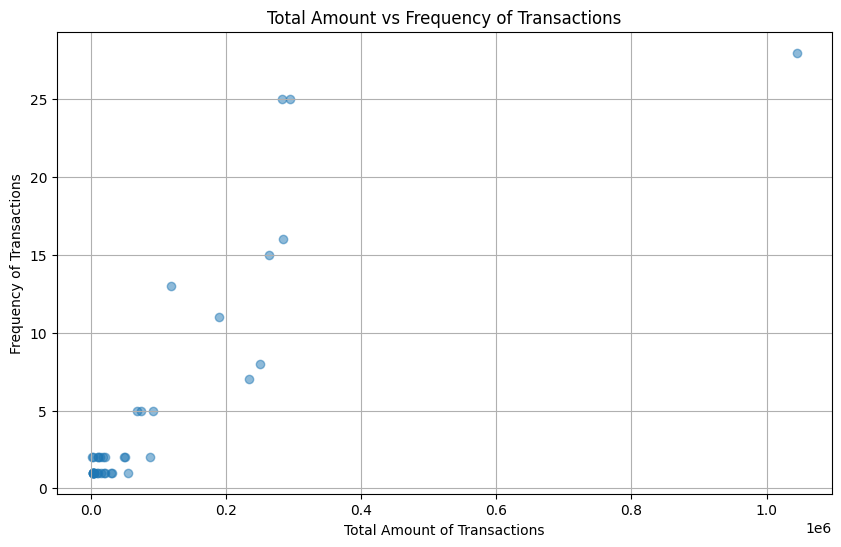

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(total_amount, frequency, alpha=0.5)
plt.xlabel('Total Amount of Transactions')
plt.ylabel('Frequency of Transactions')
plt.title('Total Amount vs Frequency of Transactions')
plt.grid(True)
plt.show()

In [35]:
df['Supplier_name'] = df['Supplier'].astype(str).str.split(' \(').str[0]

# Group by `Supplier_name` and sum the `Amount` column
total_amount_by_supplier = df.groupby('Supplier_name')['Amount'].sum()

# Sort the results in descending order
total_amount_by_supplier = total_amount_by_supplier.sort_values(ascending=False)

# Print the results
print(total_amount_by_supplier.to_markdown(numalign="left", stralign="left"))

| Supplier_name                                                                                   | Amount      |
|:------------------------------------------------------------------------------------------------|:------------|
| Urien-Loza S.A.                                                                                 | 1.04459e+06 |
| Distrosol S.A.                                                                                  | 295171      |
| Baslog S.R.L.                                                                                   | 284355      |
| Hawaii S.A.                                                                                     | 283072      |
| La Piamontesa De Averaldo Giacosa Y Cia. S.A.                                                   | 263651      |
| Tronador Sociedad Anonima Comercial                                                             | 250000      |
| Armadora San Jorge S.A.                                                               

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\User\AppData\Local\Temp\ipykernel_22668\1405665019.py:1: SyntaxWarning: invalid escape sequence '\('
  df['Supplier_name'] = df['Supplier'].astype(str).str.split(' \(').str[0]


In [38]:
transaction_frequency_by_supplier = df.groupby('Supplier_name')['Amount'].count()
transaction_frequency_by_supplier

Supplier_name
Armadora San Jorge S.A.                                                                             7
Baslog S.R.L.                                                                                      16
Bitarwan Foods S.A.                                                                                 1
Diego Alberto Badoglio                                                                              1
Distrosol S.A.                                                                                     25
Edgardo Perez S.A.                                                                                  1
Fabuel Jimena Cecilia                                                                               1
Fernandez Diego Ezequiel                                                                            1
Fss S.A.                                                                                           11
Gastrobaires S.A.                                                   

C:\Users\User\AppData\Local\Temp\ipykernel_22668\561302225.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (total_amount_by_supplier[i], transaction_frequency_by_supplier[i]), xytext=(5, -5), textcoords='offset points')


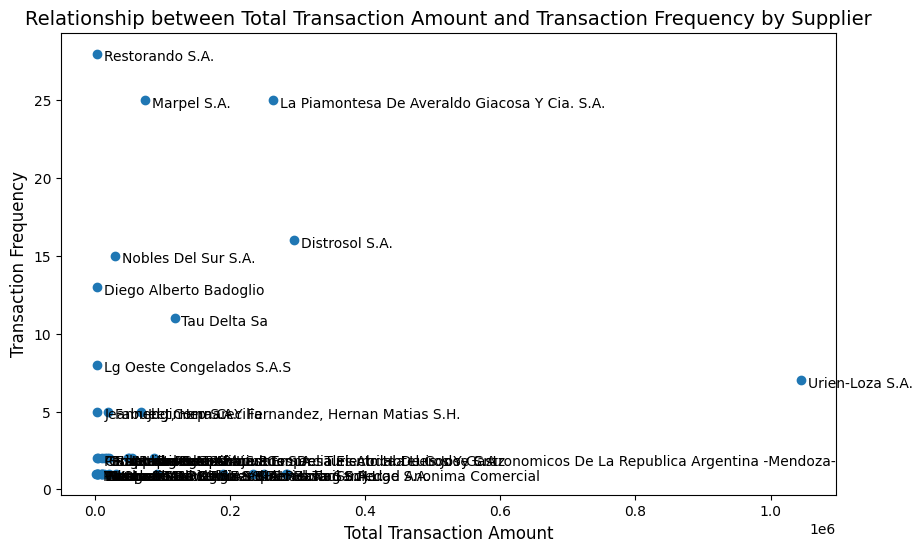

In [39]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_amount_by_supplier, transaction_frequency_by_supplier)

# Add labels and title
plt.xlabel('Total Transaction Amount', fontsize=12)
plt.ylabel('Transaction Frequency', fontsize=12)
plt.title('Relationship between Total Transaction Amount and Transaction Frequency by Supplier', fontsize=14)

for i, txt in enumerate(total_amount_by_supplier.index):
    plt.annotate(txt, (total_amount_by_supplier[i], transaction_frequency_by_supplier[i]), xytext=(5, -5), textcoords='offset points')


# Show the plot
plt.show()